## Imports

In [1]:


try:
        
    import h5py
    
    from ipywidgets import widgets, Layout, interact, interactive, interactive_output, Dropdown
    from IPython.display import display
    import matplotlib.pyplot as mplt
    import scipy
    from sympy import symbols, Eq, solve
    import numpy as np
    import random
    import seaborn as sns 
    import pandas as pd
    import graphing as gr
    #!pip install viola
    ########## Modules required for artist drawing on matplotlib
    import matplotlib.path as mpath
    import matplotlib.lines as mlines
    import matplotlib.patches as mpatches
    from matplotlib.collections import PatchCollection
    
      
except ModuleNotFoundError:
        print("A class you are trying to import is not present in the directory")
    
except Exception:
        print("Something went wrong - modules have not been imported")

else: 
    print("All relevant classes imported")

All relevant classes imported


## File selection

In [42]:
#######################################################
#### GUI 

edt_filename_1 = widgets.Text(description = 'File1 (-0.85)', value=' Exp5-2_v3_AP')
edt_filename_2 = widgets.Text(description = 'File2 (-0.65)', value=' Exp5-1_v2_AP')
edt_filename_3 = widgets.Text(description = 'File3 (-1.05)', value=' Exp5-3_v2_AP')
btn_select = widgets.Button(description = 'Select files',button_style='success')
output_file = widgets.Output()

display(edt_filename_1, edt_filename_2, edt_filename_3, btn_select,output_file)



#######################################################
#### FUNCTIONS


#df_flux = pd.DataFrame({'Compartment':[],'Na_net':[], 'Na_leak':[],'Na_Atpase':[], 'K_net':[],'K_leak':[],'K_Atpase':[],'K_kcc2':[], 'Cl_net':[],'Cl_kcc2':[],'X':[],'z':[]  })
df_ed = pd.DataFrame({'Boundary':[],'Na':[],'K':[],'Cl':[]})



def btn_select_clicked(b):
    
    
    global filename_1 , filename_2, filename_3
    
    filename_1 = "\\"
    filename_1 = filename_1 + edt_filename_1.value 
    
    filename_2 = "\\"
    filename_2 = filename_2 + edt_filename_2.value 
    
    
    filename_3 = "\\"
    filename_3 = filename_3 + edt_filename_3.value 
    
    
    ##### FILE 1 data
    
    try: 
        with h5py.File(filename_1, mode='r') as hdf:
            
            print(filename_1+" file found... loading content") 
            global C, comp_names_arr, intervals, interval_arr, t_arr, f1_v_arr
            C = hdf.get('COMPARTMENTS')
            C_group_arr =[]
            t_arr_bool = True
            comp_names_arr= list(C.keys())
                        
            C1 = C.get(comp_names_arr[0])
            
            T = hdf.get('TIMING')
            total_t = T.get('TOTAL_T')[()]
            intervals = T.get('INTERVALS')[()]
            dt = T.get("DT")[()]
            total_steps = total_t /dt          
            interval_step = total_steps / intervals
            interval_arr = [round(interval_step * i) for i in range(intervals)]
            

            t_arr =[]
            f1_v_arr = []        
            ##### LOADING COMPARTMENT DATA
            
            for i in range(len(comp_names_arr)):
                C_group = C.get(comp_names_arr[i])
                C_group_arr.append(C_group)
                v_arr = []
                for j in range(len(list(C_group.keys()))):
                    dataset = C_group.get(str(interval_arr[j]))
                    v_arr.append(dataset[-3])
                    if t_arr_bool == True:
                        t_arr.append(dataset[0]*1e3)
                f1_v_arr.append(v_arr)    
                t_arr_bool = False
                
            print(filename_1+" content loaded into memory") 
            
    except: 
        raise(filename_1+" not found")
        raise("File needs to be in base directory")
        
     ##### FILE 2 data
    
    try: 
        with h5py.File(filename_2, mode='r') as hdf:
            
            print(filename_2+" file found... loading content") 
            global f2_v_arr
            C = hdf.get('COMPARTMENTS')
            C_group_arr =[]
            f2_v_arr = []        
            ##### LOADING COMPARTMENT DATA
            comp_names_arr= list(C.keys())
            for i in range(len(comp_names_arr)):
                C_group = C.get(comp_names_arr[i])
                C_group_arr.append(C_group)
                v_arr = []
                for j in range(len(list(C_group.keys()))):
                    dataset = C_group.get(str(interval_arr[j]))
                    v_arr.append(dataset[-3])
                f2_v_arr.append(v_arr)    

            print(filename_2+" content loaded into memory") 
            
    except: 
        raise(filename_2+" not found")
        raise("File needs to be in base directory")
          
                
     ##### FILE 3 data
    
    try: 
        with h5py.File(filename_3, mode='r') as hdf:
            
            print(filename_3+" file found... loading content") 
            global f3_v_arr
            C = hdf.get('COMPARTMENTS')
            C_group_arr =[]
            f3_v_arr = []        
            ##### LOADING COMPARTMENT DATA
            
            for i in range(len(comp_names_arr)):
                C_group = C.get(comp_names_arr[i])
                C_group_arr.append(C_group)
                v_arr = []
                for j in range(len(list(C_group.keys()))):
                    dataset = C_group.get(str(interval_arr[j]))
                    v_arr.append(dataset[-3])
                f3_v_arr.append(v_arr)    

            print(filename_3+" content loaded into memory") 
            
    except: 
        raise(filename_3+" not found")
        raise("File needs to be in base directory")
          
        

btn_select.on_click(btn_select_clicked)


btn_select.on_click(btn_select_clicked)

Text(value=' Exp5-2_v3_AP', description='File1 (-0.85)')

Text(value=' Exp5-1_v2_AP', description='File2 (-0.65)')

Text(value=' Exp5-3_v2_AP', description='File3 (-1.05)')

Button(button_style='success', description='Select files', style=ButtonStyle())

Output()

\ Exp5-2_v3_AP file found... loading content
\ Exp5-2_v3_AP content loaded into memory
\ Exp5-6_v2_AP file found... loading content
\ Exp5-6_v2_AP content loaded into memory
\ Exp5-7_v4_AP file found... loading content
\ Exp5-7_v4_AP content loaded into memory


In [7]:
print(len(t_arr))

10000


## F5b 

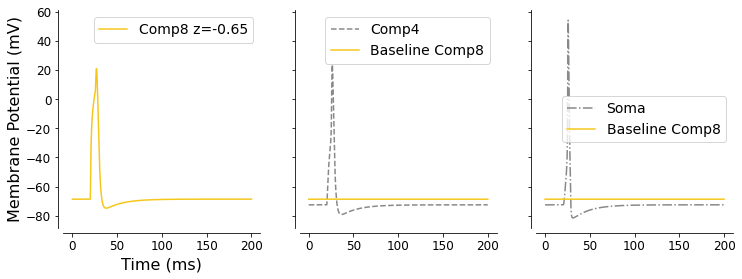

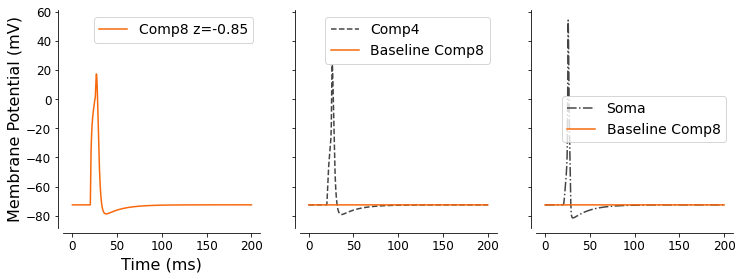

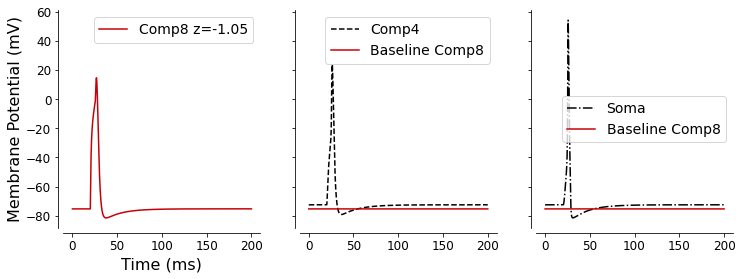

In [6]:

f5a, [ax1,ax2,ax3] = mplt.subplots(1,3,figsize=(12,4), sharey=True, sharex=True) 
sns.despine(offset=5)

color_arr = ['#F5C71B','#F7680C','#C70007']
gray_arr = ['#888888','#444444','#000000']

############################################### 
#TOP ROW
###############################################



v_arr = [f2_v_arr[8][j]*1e3 for j in range(len(t_arr))]
ax1.plot(t_arr[::], v_arr[::], '-',  label="Comp8 z=-0.65",color=color_arr[0])
baseline_8_x = t_arr[::]
baseline_8_y = [v_arr[20] for i in range(len(t_arr))]
ax1.legend(fontsize=14)


v_arr = [f2_v_arr[4][j]*1e3 for j in range(len(t_arr))]
ax2.plot(t_arr[::], v_arr[::],'--', label="Comp4",color=gray_arr[0])
ax2.plot(baseline_8_x,baseline_8_y,'-',color=color_arr[0], label = "Baseline Comp8")
ax2.legend(fontsize=14)
ax2.tick_params(axis='x', which='major', labelsize=12)


v_arr = [f2_v_arr[0][j]*1e3 for j in range(len(t_arr))]
ax3.plot(t_arr[::], v_arr[::], '-.', label="Soma",color=gray_arr[0])
ax3.plot(baseline_8_x,baseline_8_y,'-',color=color_arr[0],label="Baseline Comp8")
ax3.legend(fontsize=14)
ax3.tick_params(axis='x', which='major', labelsize=12)

ax1.set_ylabel("Membrane Potential (mV)", fontsize=16)
ax1.set_xlabel("Time (ms)",fontsize=16)
ax1.tick_params(axis='x', which='major', labelsize=12)
ax1.tick_params(axis='y', which='major', labelsize=12)


############################################
# MIDDLE ROW
############################################
f5b, [ax4,ax5,ax6] = mplt.subplots(1,3,figsize=(12,4), sharey=True, sharex=True) 
sns.despine(offset =5 )


v_arr = [f1_v_arr[8][j]*1e3 for j in range(len(t_arr))]
ax4.plot(t_arr[::], v_arr[::], '-',  label="Comp8 z=-0.85",color=color_arr[1])
baseline_8_x = t_arr[::]
baseline_8_y = [v_arr[20] for i in range(len(t_arr))]
ax4.legend(fontsize=14)


v_arr = [f1_v_arr[4][j]*1e3 for j in range(len(t_arr))]
ax5.plot(t_arr[::], v_arr[::],'--', label="Comp4",color=gray_arr[1])
ax5.plot(baseline_8_x,baseline_8_y,'-',color=color_arr[1], label = "Baseline Comp8")
ax5.legend(fontsize=14)
ax5.tick_params(axis='x', which='major', labelsize=12)


v_arr = [f1_v_arr[0][j]*1e3 for j in range(len(t_arr))]
ax6.plot(t_arr[::], v_arr[::], '-.', label="Soma",color=gray_arr[1])
ax6.plot(baseline_8_x,baseline_8_y,'-',color=color_arr[1],label="Baseline Comp8")
ax6.legend(fontsize=14)
ax6.tick_params(axis='x', which='major', labelsize=12)

ax4.set_ylabel("Membrane Potential (mV)", fontsize=16)
ax4.set_xlabel("Time (ms)",fontsize=16)
ax4.tick_params(axis='x', which='major', labelsize=12)
ax4.tick_params(axis='y', which='major', labelsize=12)




########################################################
#BOTTOM ROW
#########################################################
f5c, [ax7,ax8,ax9] = mplt.subplots(1,3,figsize=(12,4), sharey=True, sharex=True) 
sns.despine(offset =5 )


v_arr = [f3_v_arr[8][j]*1e3 for j in range(len(t_arr))]
ax7.plot(t_arr[::], v_arr[::], '-',  label="Comp8 z=-1.05",color=color_arr[2])
baseline_8_x = t_arr[::]
baseline_8_y = [v_arr[20] for i in range(len(t_arr))]
ax7.legend(fontsize=14)


v_arr = [f3_v_arr[4][j]*1e3 for j in range(len(t_arr))]
ax8.plot(t_arr[::], v_arr[::],'--', label="Comp4",color=gray_arr[2])
ax8.plot(baseline_8_x,baseline_8_y,'-',color=color_arr[2], label = "Baseline Comp8")
ax8.legend(fontsize=14)
ax8.tick_params(axis='x', which='major', labelsize=12)


v_arr = [f3_v_arr[0][j]*1e3 for j in range(len(t_arr))]
ax9.plot(t_arr[::], v_arr[::], '-.', label="Soma",color=gray_arr[2])
ax9.plot(baseline_8_x,baseline_8_y,'-',color=color_arr[2],label="Baseline Comp8")
ax9.legend(fontsize=14)
ax9.tick_params(axis='x', which='major', labelsize=12)

ax7.set_ylabel("Membrane Potential (mV)", fontsize=16)
ax7.set_xlabel("Time (ms)",fontsize=16)
ax7.tick_params(axis='x', which='major', labelsize=12)
ax7.tick_params(axis='y', which='major', labelsize=12)


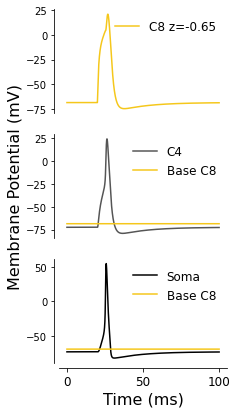

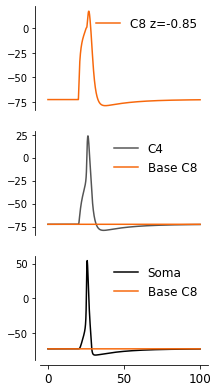

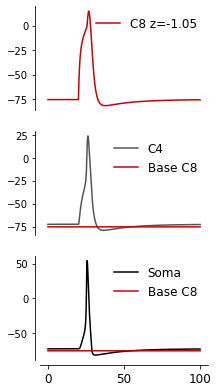

In [35]:

f5a, [ax1,ax2,ax3] = mplt.subplots(3,1,figsize=(3,6.5), sharey=False, sharex=False) 


color_arr = ['#F5C71B','#F7680C','#C70007']
gray_arr = ['#C9C9C9','#555555','#000000']

############################################### 
#TOP ROW
###############################################

v_arr = [f2_v_arr[8][j]*1e3 for j in range(len(t_arr))]
ax1.plot(t_arr[:5000:], v_arr[:5000:], '-',  label="C8 z=-0.65",color=color_arr[0])
baseline_8_x = t_arr[::]
baseline_8_y = [v_arr[20] for i in range(len(t_arr))]

v_arr = [f2_v_arr[4][j]*1e3 for j in range(len(t_arr))]
ax2.plot(t_arr[:5000:], v_arr[:5000:],'-', label="C4",color=gray_arr[1])
ax2.plot(baseline_8_x[:5000:],baseline_8_y[:5000:],'-',color=color_arr[0], label = "Base C8")


v_arr = [f2_v_arr[0][j]*1e3 for j in range(len(t_arr))]
ax3.plot(t_arr[:5000:], v_arr[:5000:], '-', label="Soma",color=gray_arr[2])
ax3.plot(baseline_8_x[:5000:],baseline_8_y[:5000:],'-',color=color_arr[0],label="Base C8")

ax3.legend(fontsize=12, frameon=False,loc='upper right')
ax2.legend(fontsize=12, frameon=False,loc='upper right')
ax1.legend(fontsize=12, frameon=False,loc='upper right')

sns.despine(ax=ax1,offset=5,bottom=True)
sns.despine(ax=ax2,offset=5,bottom=True)
sns.despine(ax=ax3,offset=5)

ax1.set_xticks([])
ax2.set_xticks([])

ax2.set_ylabel("Membrane Potential (mV)", fontsize=16)
ax3.set_xlabel("Time (ms)",fontsize=16)

ax1.tick_params(axis='y', which='major', labelsize=10)
ax2.tick_params(axis='y', which='major', labelsize=10)
ax3.tick_params(axis='x', which='major', labelsize=12)
ax3.tick_params(axis='y', which='major', labelsize=10)


############################################
# MIDDLE ROW
############################################

f5b, [ax4,ax5,ax6] = mplt.subplots(3,1,figsize=(3,6.5), sharey=False, sharex=False) 


v_arr = [f1_v_arr[8][j]*1e3 for j in range(len(t_arr))]
ax4.plot(t_arr[:5000:], v_arr[:5000:], '-',  label="C8 z=-0.85",color=color_arr[1])
baseline_8_x = t_arr[::]
baseline_8_y = [v_arr[20] for i in range(len(t_arr))]

v_arr = [f1_v_arr[4][j]*1e3 for j in range(len(t_arr))]
ax5.plot(t_arr[:5000:], v_arr[:5000:],'-', label="C4",color=gray_arr[1])
ax5.plot(baseline_8_x[:5000:],baseline_8_y[:5000:],'-',color=color_arr[1], label = "Base C8")

v_arr = [f1_v_arr[0][j]*1e3 for j in range(len(t_arr))]
ax6.plot(t_arr[:5000:], v_arr[:5000:], '-', label="Soma",color=gray_arr[2])
ax6.plot(baseline_8_x[:5000:],baseline_8_y[:5000:],'-',color=color_arr[1],label="Base C8")

ax6.legend(fontsize=12, frameon=False,loc='upper right')
ax5.legend(fontsize=12, frameon=False,loc='upper right')
ax4.legend(fontsize=12, frameon=False,loc='upper right')

sns.despine(ax=ax4,offset=5,bottom=True)
sns.despine(ax=ax5,offset=5,bottom=True)
sns.despine(ax=ax6,offset=5)

ax4.set_xticks([])
ax5.set_xticks([])

#ax5.set_ylabel("Membrane Potential (mV)", fontsize=16)
#ax6.set_xlabel("Time (ms)",fontsize=16)

ax4.tick_params(axis='y', which='major', labelsize=10)
ax5.tick_params(axis='y', which='major', labelsize=10)
ax6.tick_params(axis='x', which='major', labelsize=12)
ax6.tick_params(axis='y', which='major', labelsize=10)




########################################################
#BOTTOM ROW
#########################################################
f5c, [ax7,ax8,ax9] = mplt.subplots(3,1,figsize=(3,6.5), sharey=False, sharex=False) 

v_arr = [f3_v_arr[8][j]*1e3 for j in range(len(t_arr))]
ax7.plot(t_arr[:5000:], v_arr[:5000:], '-',  label="C8 z=-1.05",color=color_arr[2])
baseline_8_x = t_arr[::]
baseline_8_y = [v_arr[20] for i in range(len(t_arr))]

v_arr = [f3_v_arr[4][j]*1e3 for j in range(len(t_arr))]
ax8.plot(t_arr[:5000:], v_arr[:5000:],'-', label="C4",color=gray_arr[1])
ax8.plot(baseline_8_x[:5000:],baseline_8_y[:5000:],'-',color=color_arr[2], label = "Base C8")


v_arr = [f3_v_arr[0][j]*1e3 for j in range(len(t_arr))]
ax9.plot(t_arr[:5000:], v_arr[:5000:], '-', label="Soma",color=gray_arr[2])
ax9.plot(baseline_8_x[:5000:],baseline_8_y[:5000:],'-',color=color_arr[2],label="Base C8")

ax9.legend(fontsize=12, frameon=False,loc='upper right')
ax8.legend(fontsize=12, frameon=False,loc='upper right')
ax7.legend(fontsize=12, frameon=False,loc='upper right')

sns.despine(ax=ax7,offset=5,bottom=True)
sns.despine(ax=ax8,offset=5,bottom=True)
sns.despine(ax=ax9,offset=5)

ax7.set_xticks([])
ax8.set_xticks([])

#ax8.set_ylabel("Membrane Potential (mV)", fontsize=16)
#ax9.set_xlabel("Time (ms)",fontsize=16)

ax7.tick_params(axis='y', which='major', labelsize=10)
ax8.tick_params(axis='y', which='major', labelsize=10)
ax9.tick_params(axis='x', which='major', labelsize=12)
ax9.tick_params(axis='y', which='major', labelsize=10)


## F5c

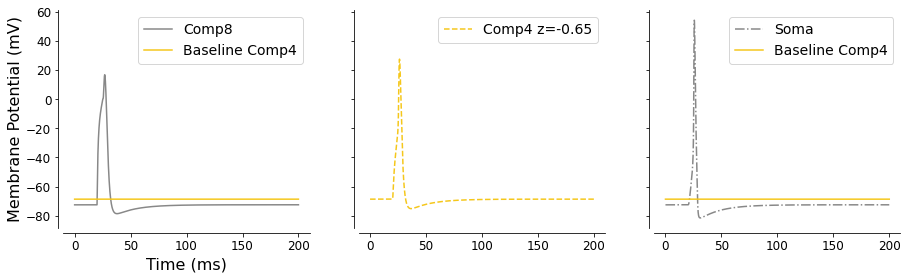

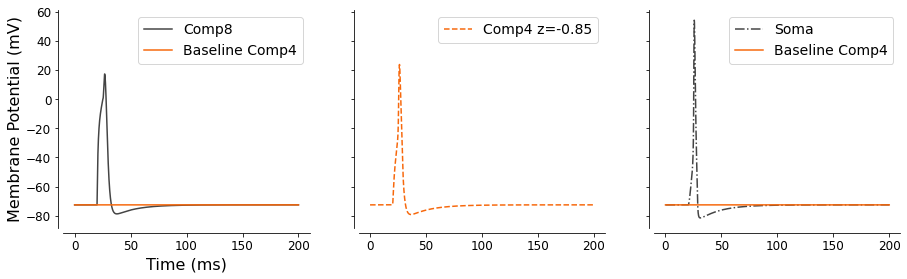

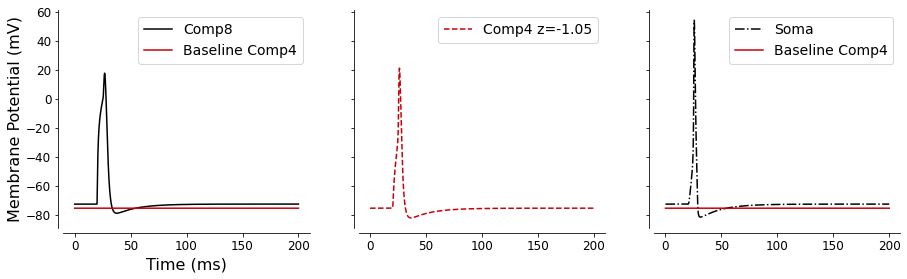

In [37]:

f5a, [ax1,ax2,ax3] = mplt.subplots(1,3,figsize=(15,4), sharey=True, sharex=True) 
sns.despine(offset=5)

color_arr = ['#F5C71B','#F7680C','#C70007']
gray_arr = ['#888888','#444444','#000000']

############################################### 
#TOP ROW
###############################################


v_arr = [f2_v_arr[8][j]*1e3 for j in range(len(t_arr))]
ax1.plot(t_arr[::], v_arr[::], '-',  label="Comp8",color=gray_arr[0])


v_arr = [f2_v_arr[4][j]*1e3 for j in range(len(t_arr))]
ax2.plot(t_arr[::], v_arr[::],'--', label="Comp4 z=-0.65",color=color_arr[0])
baseline_4_x = t_arr[::]
baseline_4_y = [v_arr[20] for i in range(len(t_arr))]

ax2.legend(fontsize=14)
ax2.tick_params(axis='x', which='major', labelsize=12)


v_arr = [f2_v_arr[0][j]*1e3 for j in range(len(t_arr))]
ax3.plot(t_arr[::], v_arr[::], '-.', label="Soma",color=gray_arr[0])
ax3.plot(baseline_4_x,baseline_4_y,'-',color=color_arr[0], label = "Baseline Comp4")
ax3.legend(fontsize=14)
ax3.tick_params(axis='x', which='major', labelsize=12)

ax1.set_ylabel("Membrane Potential (mV)", fontsize=16)
ax1.set_xlabel("Time (ms)",fontsize=16)
ax1.tick_params(axis='x', which='major', labelsize=12)
ax1.tick_params(axis='y', which='major', labelsize=12)
ax1.plot(baseline_4_x,baseline_4_y,'-',color=color_arr[0], label = "Baseline Comp4")
ax1.legend(fontsize=14)


############################################
# MIDDLE ROW
############################################
f5b, [ax4,ax5,ax6] = mplt.subplots(1,3,figsize=(15,4), sharey=True, sharex=True) 
sns.despine(offset =5 )

v_arr = [f1_v_arr[8][j]*1e3 for j in range(len(t_arr))]
ax4.plot(t_arr[::], v_arr[::], '-',  label="Comp8",color=gray_arr[1])

v_arr = [f1_v_arr[4][j]*1e3 for j in range(len(t_arr))]
ax5.plot(t_arr[::], v_arr[::],'--', label="Comp4 z=-0.85",color=color_arr[1])
baseline_4_x = t_arr[::]
baseline_4_y = [v_arr[20] for i in range(len(t_arr))]

ax5.legend(fontsize=14)
ax5.tick_params(axis='x', which='major', labelsize=12)

v_arr = [f1_v_arr[0][j]*1e3 for j in range(len(t_arr))]
ax6.plot(t_arr[::], v_arr[::], '-.', label="Soma",color=gray_arr[1])
ax6.plot(baseline_4_x,baseline_4_y,'-',color=color_arr[1], label = "Baseline Comp4")
ax6.legend(fontsize=14)
ax6.tick_params(axis='x', which='major', labelsize=12)

ax4.set_ylabel("Membrane Potential (mV)", fontsize=16)
ax4.set_xlabel("Time (ms)",fontsize=16)
ax4.tick_params(axis='x', which='major', labelsize=12)
ax4.tick_params(axis='y', which='major', labelsize=12)
ax4.plot(baseline_4_x,baseline_4_y,'-',color=color_arr[1], label = "Baseline Comp4")
ax4.legend(fontsize=14)



########################################################
#BOTTOM ROW
#########################################################
f5c, [ax7,ax8,ax9] = mplt.subplots(1,3,figsize=(15,4), sharey=True, sharex=True) 
sns.despine(offset =5 )

v_arr = [f3_v_arr[8][j]*1e3 for j in range(len(t_arr))]
ax7.plot(t_arr[::], v_arr[::], '-',  label="Comp8",color=gray_arr[2])

v_arr = [f3_v_arr[4][j]*1e3 for j in range(len(t_arr))]
ax8.plot(t_arr[::], v_arr[::],'--', label="Comp4 z=-1.05",color=color_arr[2])
baseline_4_x = t_arr[::]
baseline_4_y = [v_arr[20] for i in range(len(t_arr))]

ax8.legend(fontsize=14)
ax8.tick_params(axis='x', which='major', labelsize=12)

v_arr = [f3_v_arr[0][j]*1e3 for j in range(len(t_arr))]
ax9.plot(t_arr[::], v_arr[::], '-.', label="Soma",color=gray_arr[2])
ax9.plot(baseline_4_x,baseline_4_y,'-',color=color_arr[2], label = "Baseline Comp4")
ax9.legend(fontsize=14)
ax9.tick_params(axis='x', which='major', labelsize=12)

ax7.set_ylabel("Membrane Potential (mV)", fontsize=16)
ax7.set_xlabel("Time (ms)",fontsize=16)
ax7.tick_params(axis='x', which='major', labelsize=12)
ax7.tick_params(axis='y', which='major', labelsize=12)
ax7.plot(baseline_4_x,baseline_4_y,'-',color=color_arr[2], label = "Baseline Comp4")
ax7.legend(fontsize=14)


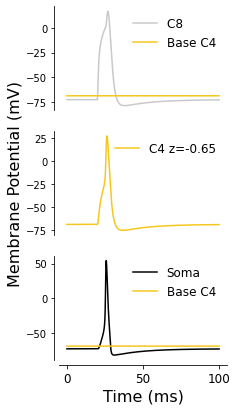

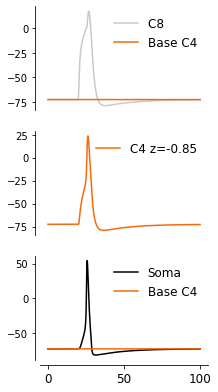

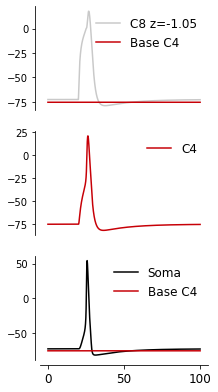

In [41]:

f5a, [ax1,ax2,ax3] = mplt.subplots(3,1,figsize=(3,6.5), sharey=False, sharex=False) 


color_arr = ['#F5C71B','#F7680C','#C70007']
gray_arr = ['#C9C9C9','#555555','#000000']

############################################### 
#TOP ROW
###############################################

v_arr = [f2_v_arr[8][j]*1e3 for j in range(len(t_arr))]
ax1.plot(t_arr[:5000:], v_arr[:5000:], '-',  label="C8 ",color=gray_arr[0])


v_arr = [f2_v_arr[4][j]*1e3 for j in range(len(t_arr))]
ax2.plot(t_arr[:5000:], v_arr[:5000:],'-', label="C4 z=-0.65",color=color_arr[0])

baseline_4_x = t_arr[::]
baseline_4_y = [v_arr[20] for i in range(len(t_arr))]

v_arr = [f2_v_arr[0][j]*1e3 for j in range(len(t_arr))]
ax3.plot(t_arr[:5000:], v_arr[:5000:], '-', label="Soma",color=gray_arr[2])


ax1.plot(baseline_4_x[:5000:],baseline_4_y[:5000:],'-',color=color_arr[0], label = "Base C4")
ax3.plot(baseline_4_x[:5000:],baseline_4_y[:5000:],'-',color=color_arr[0], label = "Base C4")

ax3.legend(fontsize=12, frameon=False,loc='upper right')
ax2.legend(fontsize=12, frameon=False,loc='upper right')
ax1.legend(fontsize=12, frameon=False,loc='upper right')

sns.despine(ax=ax1,offset=5,bottom=True)
sns.despine(ax=ax2,offset=5,bottom=True)
sns.despine(ax=ax3,offset=5)

ax1.set_xticks([])
ax2.set_xticks([])

ax2.set_ylabel("Membrane Potential (mV)", fontsize=16)
ax3.set_xlabel("Time (ms)",fontsize=16)

ax1.tick_params(axis='y', which='major', labelsize=10)
ax2.tick_params(axis='y', which='major', labelsize=10)
ax3.tick_params(axis='x', which='major', labelsize=12)
ax3.tick_params(axis='y', which='major', labelsize=10)


############################################
# MIDDLE ROW
############################################

f5b, [ax4,ax5,ax6] = mplt.subplots(3,1,figsize=(3,6.5), sharey=False, sharex=False) 

v_arr = [f1_v_arr[8][j]*1e3 for j in range(len(t_arr))]
ax4.plot(t_arr[:5000:], v_arr[:5000:], '-',  label="C8 ",color=gray_arr[0])

v_arr = [f1_v_arr[4][j]*1e3 for j in range(len(t_arr))]
ax5.plot(t_arr[:5000:], v_arr[:5000:],'-', label="C4 z=-0.85",color=color_arr[1])

baseline_4_x = t_arr[::]
baseline_4_y = [v_arr[20] for i in range(len(t_arr))]

v_arr = [f1_v_arr[0][j]*1e3 for j in range(len(t_arr))]
ax6.plot(t_arr[:5000:], v_arr[:5000:], '-', label="Soma",color=gray_arr[2])


ax4.plot(baseline_4_x[:5000:],baseline_4_y[:5000:],'-',color=color_arr[1], label = "Base C4")
ax6.plot(baseline_4_x[:5000:],baseline_4_y[:5000:],'-',color=color_arr[1], label = "Base C4")

ax6.legend(fontsize=12, frameon=False,loc='upper right')
ax5.legend(fontsize=12, frameon=False,loc='upper right')
ax4.legend(fontsize=12, frameon=False,loc='upper right')

sns.despine(ax=ax4,offset=5,bottom=True)
sns.despine(ax=ax5,offset=5,bottom=True)
sns.despine(ax=ax6,offset=5)

ax4.set_xticks([])
ax5.set_xticks([])

#ax5.set_ylabel("Membrane Potential (mV)", fontsize=16)
#ax6.set_xlabel("Time (ms)",fontsize=16)

ax4.tick_params(axis='y', which='major', labelsize=10)
ax5.tick_params(axis='y', which='major', labelsize=10)
ax6.tick_params(axis='x', which='major', labelsize=12)
ax6.tick_params(axis='y', which='major', labelsize=10)



########################################################
#BOTTOM ROW
#########################################################
f5c, [ax7,ax8,ax9] = mplt.subplots(3,1,figsize=(3,6.5), sharey=False, sharex=False) 

v_arr = [f3_v_arr[8][j]*1e3 for j in range(len(t_arr))]
ax7.plot(t_arr[:5000:], v_arr[:5000:], '-',  label="C8 z=-1.05",color=gray_arr[0])

v_arr = [f3_v_arr[4][j]*1e3 for j in range(len(t_arr))]
ax8.plot(t_arr[:5000:], v_arr[:5000:],'-', label="C4",color=color_arr[2])

baseline_4_x = t_arr[::]
baseline_4_y = [v_arr[20] for i in range(len(t_arr))]

v_arr = [f3_v_arr[0][j]*1e3 for j in range(len(t_arr))]
ax9.plot(t_arr[:5000:], v_arr[:5000:], '-', label="Soma",color=gray_arr[2])

ax7.plot(baseline_4_x[:5000:],baseline_4_y[:5000:],'-',color=color_arr[2], label = "Base C4")
ax9.plot(baseline_4_x[:5000:],baseline_4_y[:5000:],'-',color=color_arr[2], label = "Base C4")

ax9.legend(fontsize=12, frameon=False,loc='upper right')
ax8.legend(fontsize=12, frameon=False,loc='upper right')
ax7.legend(fontsize=12, frameon=False,loc='upper right')

sns.despine(ax=ax7,offset=5,bottom=True)
sns.despine(ax=ax8,offset=5,bottom=True)
sns.despine(ax=ax9,offset=5)

ax7.set_xticks([])
ax8.set_xticks([])

#ax8.set_ylabel("Membrane Potential (mV)", fontsize=16)
#ax9.set_xlabel("Time (ms)",fontsize=16)

ax7.tick_params(axis='y', which='major', labelsize=10)
ax8.tick_params(axis='y', which='major', labelsize=10)
ax9.tick_params(axis='x', which='major', labelsize=12)
ax9.tick_params(axis='y', which='major', labelsize=10)


## f5d

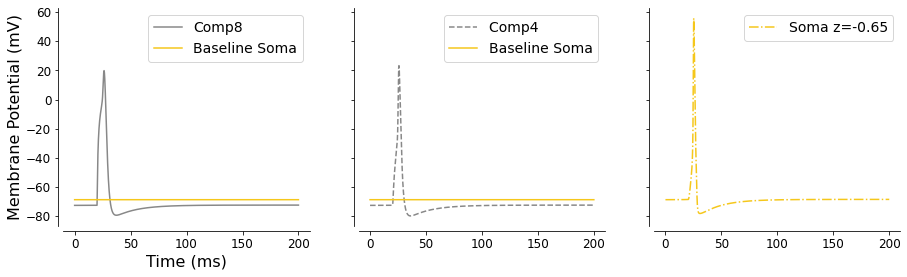

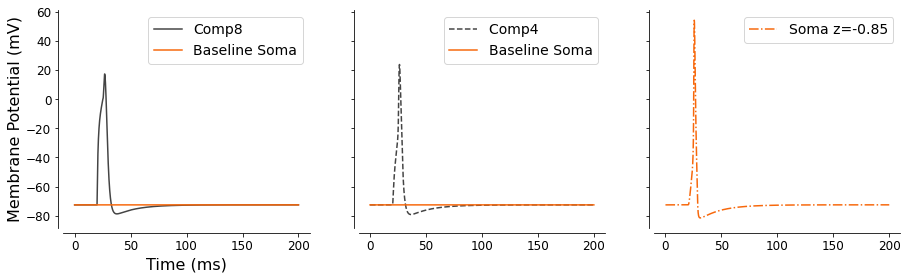

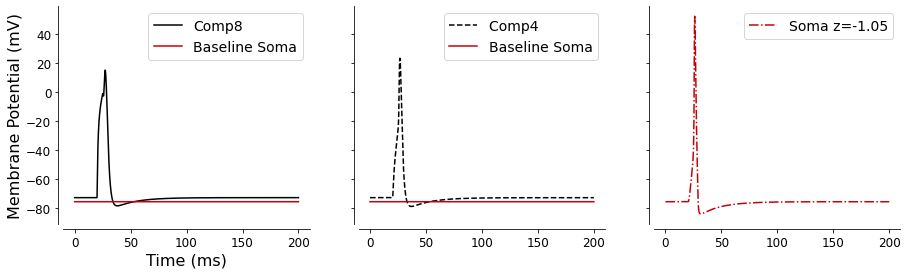

In [8]:

f5a, [ax1,ax2,ax3] = mplt.subplots(3,1,figsize=(3,6.5), sharey=False, sharex=False) 


color_arr = ['#F5C71B','#F7680C','#C70007']
gray_arr = ['#C9C9C9','#555555','#000000']

############################################### 
#TOP ROW
###############################################

v_arr = [f2_v_arr[8][j]*1e3 for j in range(len(t_arr))]
ax1.plot(t_arr[:5000:], v_arr[:5000:], '-',  label="C8 z=-0.65",color=color_arr[0])
baseline_8_x = t_arr[::]
baseline_8_y = [v_arr[20] for i in range(len(t_arr))]

v_arr = [f2_v_arr[4][j]*1e3 for j in range(len(t_arr))]
ax2.plot(t_arr[:5000:], v_arr[:5000:],'-', label="C4",color=gray_arr[1])
ax2.plot(baseline_8_x[:5000:],baseline_8_y[:5000:],'-',color=color_arr[0], label = "Base C8")


v_arr = [f2_v_arr[0][j]*1e3 for j in range(len(t_arr))]
ax3.plot(t_arr[:5000:], v_arr[:5000:], '-', label="Soma",color=gray_arr[2])
ax3.plot(baseline_8_x[:5000:],baseline_8_y[:5000:],'-',color=color_arr[0],label="Base C8")

ax3.legend(fontsize=12, frameon=False,loc='upper right')
ax2.legend(fontsize=12, frameon=False,loc='upper right')
ax1.legend(fontsize=12, frameon=False,loc='upper right')

sns.despine(ax=ax1,offset=5,bottom=True)
sns.despine(ax=ax2,offset=5,bottom=True)
sns.despine(ax=ax3,offset=5)

ax1.set_xticks([])
ax2.set_xticks([])

ax2.set_ylabel("Membrane Potential (mV)", fontsize=16)
ax3.set_xlabel("Time (ms)",fontsize=16)

ax1.tick_params(axis='y', which='major', labelsize=10)
ax2.tick_params(axis='y', which='major', labelsize=10)
ax3.tick_params(axis='x', which='major', labelsize=12)
ax3.tick_params(axis='y', which='major', labelsize=10)


############################################
# MIDDLE ROW
############################################

f5b, [ax4,ax5,ax6] = mplt.subplots(3,1,figsize=(3,6.5), sharey=False, sharex=False) 


v_arr = [f1_v_arr[8][j]*1e3 for j in range(len(t_arr))]
ax4.plot(t_arr[:5000:], v_arr[:5000:], '-',  label="C8 z=-0.85",color=color_arr[1])
baseline_8_x = t_arr[::]
baseline_8_y = [v_arr[20] for i in range(len(t_arr))]

v_arr = [f1_v_arr[4][j]*1e3 for j in range(len(t_arr))]
ax5.plot(t_arr[:5000:], v_arr[:5000:],'-', label="C4",color=gray_arr[1])
ax5.plot(baseline_8_x[:5000:],baseline_8_y[:5000:],'-',color=color_arr[1], label = "Base C8")

v_arr = [f1_v_arr[0][j]*1e3 for j in range(len(t_arr))]
ax6.plot(t_arr[:5000:], v_arr[:5000:], '-', label="Soma",color=gray_arr[2])
ax6.plot(baseline_8_x[:5000:],baseline_8_y[:5000:],'-',color=color_arr[1],label="Base C8")

ax6.legend(fontsize=12, frameon=False,loc='upper right')
ax5.legend(fontsize=12, frameon=False,loc='upper right')
ax4.legend(fontsize=12, frameon=False,loc='upper right')

sns.despine(ax=ax4,offset=5,bottom=True)
sns.despine(ax=ax5,offset=5,bottom=True)
sns.despine(ax=ax6,offset=5)

ax4.set_xticks([])
ax5.set_xticks([])

#ax5.set_ylabel("Membrane Potential (mV)", fontsize=16)
#ax6.set_xlabel("Time (ms)",fontsize=16)

ax4.tick_params(axis='y', which='major', labelsize=10)
ax5.tick_params(axis='y', which='major', labelsize=10)
ax6.tick_params(axis='x', which='major', labelsize=12)
ax6.tick_params(axis='y', which='major', labelsize=10)




########################################################
#BOTTOM ROW
#########################################################
f5c, [ax7,ax8,ax9] = mplt.subplots(3,1,figsize=(3,6.5), sharey=False, sharex=False) 

v_arr = [f3_v_arr[8][j]*1e3 for j in range(len(t_arr))]
ax7.plot(t_arr[:5000:], v_arr[:5000:], '-',  label="C8 z=-1.05",color=color_arr[2])
baseline_8_x = t_arr[::]
baseline_8_y = [v_arr[20] for i in range(len(t_arr))]

v_arr = [f3_v_arr[4][j]*1e3 for j in range(len(t_arr))]
ax8.plot(t_arr[:5000:], v_arr[:5000:],'-', label="C4",color=gray_arr[1])
ax8.plot(baseline_8_x[:5000:],baseline_8_y[:5000:],'-',color=color_arr[2], label = "Base C8")


v_arr = [f3_v_arr[0][j]*1e3 for j in range(len(t_arr))]
ax9.plot(t_arr[:5000:], v_arr[:5000:], '-', label="Soma",color=gray_arr[2])
ax9.plot(baseline_8_x[:5000:],baseline_8_y[:5000:],'-',color=color_arr[2],label="Base C8")

ax9.legend(fontsize=12, frameon=False,loc='upper right')
ax8.legend(fontsize=12, frameon=False,loc='upper right')
ax7.legend(fontsize=12, frameon=False,loc='upper right')

sns.despine(ax=ax7,offset=5,bottom=True)
sns.despine(ax=ax8,offset=5,bottom=True)
sns.despine(ax=ax9,offset=5)

ax7.set_xticks([])
ax8.set_xticks([])

#ax8.set_ylabel("Membrane Potential (mV)", fontsize=16)
#ax9.set_xlabel("Time (ms)",fontsize=16)

ax7.tick_params(axis='y', which='major', labelsize=10)
ax8.tick_params(axis='y', which='major', labelsize=10)
ax9.tick_params(axis='x', which='major', labelsize=12)
ax9.tick_params(axis='y', which='major', labelsize=10)


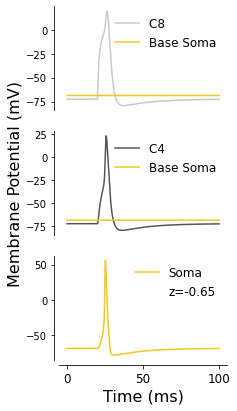

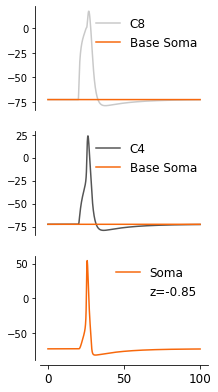

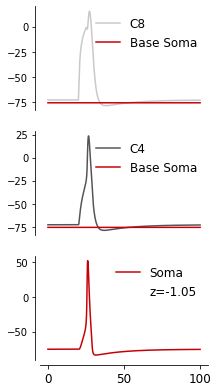

In [55]:

f5a, [ax1,ax2,ax3] = mplt.subplots(3,1,figsize=(3,6.5), sharey=False, sharex=False) 


color_arr = ['#F5C71B','#F7680C','#C70007']
gray_arr = ['#C9C9C9','#555555','#000000']

############################################### 
#TOP ROW
###############################################

v_arr = [f2_v_arr[8][j]*1e3 for j in range(len(t_arr))]
ax1.plot(t_arr[:5000:], v_arr[:5000:], '-',  label="C8 ",color=gray_arr[0])

v_arr = [f2_v_arr[4][j]*1e3 for j in range(len(t_arr))]
ax2.plot(t_arr[:5000:], v_arr[:5000:],'-', label="C4 ",color=gray_arr[1])

v_arr = [f2_v_arr[0][j]*1e3 for j in range(len(t_arr))]
ax3.plot(t_arr[:5000:], v_arr[:5000:], '-', label="z=-0.65",color=color_arr[0])
ax3.plot(1,1,color='white')

baseline_0_x = t_arr[::]
baseline_0_y = [v_arr[20] for i in range(len(t_arr))]

ax1.plot(baseline_0_x[:5000:],baseline_0_y[:5000:],'-',color=color_arr[0], label = "Base Soma")
ax2.plot(baseline_0_x[:5000:],baseline_0_y[:5000:],'-',color=color_arr[0], label = "Base Soma")

ax3.legend(["Soma","z=-0.65"],fontsize=12, frameon=False,loc='upper right')
ax2.legend(fontsize=12, frameon=False,loc='upper right')
ax1.legend(fontsize=12, frameon=False,loc='upper right')

sns.despine(ax=ax1,offset=5,bottom=True)
sns.despine(ax=ax2,offset=5,bottom=True)
sns.despine(ax=ax3,offset=5)

ax1.set_xticks([])
ax2.set_xticks([])

ax2.set_ylabel("Membrane Potential (mV)", fontsize=16)
ax3.set_xlabel("Time (ms)",fontsize=16)

ax1.tick_params(axis='y', which='major', labelsize=10)
ax2.tick_params(axis='y', which='major', labelsize=10)
ax3.tick_params(axis='x', which='major', labelsize=12)
ax3.tick_params(axis='y', which='major', labelsize=10)


############################################
# MIDDLE ROW
############################################

f5b, [ax4,ax5,ax6] = mplt.subplots(3,1,figsize=(3,6.5), sharey=False, sharex=False) 

v_arr = [f1_v_arr[8][j]*1e3 for j in range(len(t_arr))]
ax4.plot(t_arr[:5000:], v_arr[:5000:], '-',  label="C8",color=gray_arr[0])

v_arr = [f1_v_arr[4][j]*1e3 for j in range(len(t_arr))]
ax5.plot(t_arr[:5000:], v_arr[:5000:],'-', label="C4",color=gray_arr[1])

v_arr = [f1_v_arr[0][j]*1e3 for j in range(len(t_arr))]
ax6.plot(t_arr[:5000:], v_arr[:5000:], '-', label="z=-0.85",color=color_arr[1])
ax6.plot(1,1,color='white')

baseline_0_x = t_arr[::]
baseline_0_y = [v_arr[20] for i in range(len(t_arr))]

ax4.plot(baseline_0_x[:5000:],baseline_0_y[:5000:],'-',color=color_arr[1], label = "Base Soma")
ax5.plot(baseline_0_x[:5000:],baseline_0_y[:5000:],'-',color=color_arr[1], label = "Base Soma")

ax6.legend(["Soma","z=-0.85"],fontsize=12, frameon=False,loc='upper right')
ax5.legend(fontsize=12, frameon=False,loc='upper right')
ax4.legend(fontsize=12, frameon=False,loc='upper right')

sns.despine(ax=ax4,offset=5,bottom=True)
sns.despine(ax=ax5,offset=5,bottom=True)
sns.despine(ax=ax6,offset=5)

ax4.set_xticks([])
ax5.set_xticks([])

#ax5.set_ylabel("Membrane Potential (mV)", fontsize=16)
#ax6.set_xlabel("Time (ms)",fontsize=16)

ax4.tick_params(axis='y', which='major', labelsize=10)
ax5.tick_params(axis='y', which='major', labelsize=10)
ax6.tick_params(axis='x', which='major', labelsize=12)
ax6.tick_params(axis='y', which='major', labelsize=10)

########################################################
#BOTTOM ROW
#########################################################
f5c, [ax7,ax8,ax9] = mplt.subplots(3,1,figsize=(3,6.5), sharey=False, sharex=False) 

v_arr = [f3_v_arr[8][j]*1e3 for j in range(len(t_arr))]
ax7.plot(t_arr[:5000:], v_arr[:5000:], '-',  label="C8",color=gray_arr[0])

v_arr = [f3_v_arr[4][j]*1e3 for j in range(len(t_arr))]
ax8.plot(t_arr[:5000:], v_arr[:5000:],'-', label="C4",color=gray_arr[1])

v_arr = [f3_v_arr[0][j]*1e3 for j in range(len(t_arr))]
ax9.plot(t_arr[:5000:], v_arr[:5000:], '-', label="z=-1.05",color=color_arr[2])
ax9.plot(1,1,color='white')

baseline_0_x = t_arr[::]
baseline_0_y = [v_arr[20] for i in range(len(t_arr))]

ax7.plot(baseline_0_x[:5000:],baseline_0_y[:5000:],'-',color=color_arr[2], label = "Base Soma")
ax8.plot(baseline_0_x[:5000:],baseline_0_y[:5000:],'-',color=color_arr[2], label = "Base Soma")

ax9.legend(["Soma","z=-1.05"],fontsize=12, frameon=False,loc='upper right')
ax8.legend(fontsize=12, frameon=False,loc='upper right')
ax7.legend(fontsize=12, frameon=False,loc='upper right')

sns.despine(ax=ax7,offset=5,bottom=True)
sns.despine(ax=ax8,offset=5,bottom=True)
sns.despine(ax=ax9,offset=5)

ax7.set_xticks([])
ax8.set_xticks([])

#ax5.set_ylabel("Membrane Potential (mV)", fontsize=16)
#ax6.set_xlabel("Time (ms)",fontsize=16)

ax7.tick_params(axis='y', which='major', labelsize=10)
ax8.tick_params(axis='y', which='major', labelsize=10)
ax9.tick_params(axis='x', which='major', labelsize=12)
ax9.tick_params(axis='y', which='major', labelsize=10)